# Trabalho 3

Bianca Nunes Coelho - 15102880<br>
Raíssa Nunes Coelho - 15102887<br>

## Introdução
No cenário atual de constante fluxo de informações, o jornalismo desempenha um papel crucial na disseminação de notícias e na formação de opinião pública. Com a crescente quantidade de conteúdo jornalístico disponível online, surge a necessidade de técnicas automatizadas para organizar e classificar essas informações de maneira eficiente. Neste projeto, propomos explorar o uso do Processamento de Linguagem Natural (PLN) para classificar textos de matérias jornalísticas, visando aprimorar a organização e a acessibilidade desse conteúdo.

## Bibliotecas

In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

## Dataset

In [2]:
file = "train-00000-of-00001-ecf072e7202447d8.parquet"
df = pd.read_parquet(file, engine= 'pyarrow')

In [3]:
len(df)

3877

In [4]:
df.head(4)

,titulo,texto,link,resumo,categoria,data_hora
0,"Veja a trajetória de Fernando Diniz, em busca ...",Se tem um treinador que sempre foi badalado pe...,https://www.cnnbrasil.com.br/esportes/veja-a-t...,Técnico tricolor e da Seleção Brasileira tem a...,esportes,2023-11-04 12:26:18
1,"Após tempestade com ventos, São Paulo terá sáb...",Após uma tempestade com ventos de mais de 100 ...,https://www.cnnbrasil.com.br/nacional/apos-tem...,"Termômetros devem chegar a 26ºC, esquentando a...",nacional,2023-11-04 12:15:44
2,Como os aplicativos de relacionamento “arruina...,Jenny Nguyen-Don estava com vontade de comer f...,https://www.cnnbrasil.com.br/tecnologia/como-o...,Pessoas em busca de relacionamentos afirmam qu...,tecnologia,2023-11-04 12:15:07
3,Fluminense pode ser o 26º clube a levantar a t...,O Fluminense vai em busca do primeiro título d...,https://www.cnnbrasil.com.br/esportes/fluminen...,"Em busca do título inédito, o Tricolor carioca...",esportes,2023-11-04 12:05:24


## Balanceamento

In [5]:
df['categoria'].value_counts()

esportes           960
nacional           623
internacional      618
economia           562
politica           507
entretenimento     450
tecnologia          44
saude               41
noticias            38
lifestyle           21
branded-content     13
Name: categoria, dtype: int64

<AxesSubplot: >

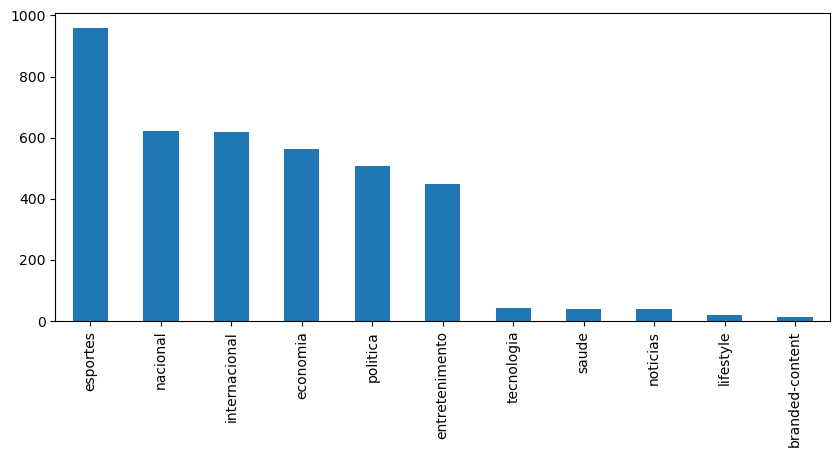

In [6]:
plt.figure(figsize=(10,4))
df.categoria.value_counts().plot(kind='bar')

In [7]:
indice_linha_remover = ['tecnologia',  'saude','noticias','lifestyle','branded-content']

In [8]:
df = df[~df['categoria'].isin(indice_linha_remover)]

In [9]:
df['categoria'].value_counts()

esportes          960
nacional          623
internacional     618
economia          562
politica          507
entretenimento    450
Name: categoria, dtype: int64

In [10]:
# Undersampling
min = df['categoria'].value_counts().min()

amostras = []

for i in df['categoria'].value_counts().index:
    a = df[df['categoria'] == i].sample(min, replace=False)
    amostras.append(a)

df_balanceado = pd.concat(amostras)

In [11]:
df_balanceado['categoria'].value_counts()

esportes          450
nacional          450
internacional     450
economia          450
politica          450
entretenimento    450
Name: categoria, dtype: int64

In [12]:
df_balanceado = df_balanceado.reset_index(drop=True)
df_balanceado.head(5)

,titulo,texto,link,resumo,categoria,data_hora
0,"Carrasco na Libertadores, Corinthians faz 8 a ...",Após vencer o arquirrival na decisão da Copa L...,https://www.cnnbrasil.com.br/esportes/carrasco...,"Na final, o Corinthians enfrentará o vencedor ...",esportes,2023-11-12 18:24:58
1,Vítor Pereira diz que jogadores brasileiros ch...,O técnico português Vítor Pereira afirmou que ...,https://www.cnnbrasil.com.br/esportes/vitor-pe...,Ex-treinador de Corinthians e Flamengo comento...,esportes,2023-11-09 14:22:18
2,Daniel Alves oferece R$ 800 mil à denuciante p...,Após ter o terceiro pedido de liberdade provis...,https://www.cnnbrasil.com.br/esportes/daniel-a...,Após terceira negativa de liberdade provisória...,esportes,2023-11-28 14:52:13
3,STJD determina que Cruzeiro e Coritiba joguem ...,O Superior Tribunal de Justiça Desportiva (STJ...,https://www.cnnbrasil.com.br/esportes/stjd-det...,Decisão do STJD foi anunciada nesta quinta; pu...,esportes,2023-11-16 21:00:08
4,"Diniz diz que enfrentar Messi é diferente, mas...",Fernando Diniz admitiu que enfrentar Lionel Me...,https://www.cnnbrasil.com.br/esportes/diniz-di...,Treinador vai manter tática habitual para conf...,esportes,2023-11-20 23:35:51


In [13]:
# pega coluna
text = df_balanceado['texto'] # para NLTK
len(text)

2700

## Pré-processamento

In [15]:
for i in range(len(text)):
    text[i] = text[i].lower()

In [16]:
from unidecode import unidecode

for i in range(len(text)):
    text[i] = unidecode(text[i])

In [17]:
for i in range(len(text)):
    text[i] = re.sub(r'[^a-zA-Z\s]', "" ,text[i])

In [18]:
token_text = []

for j in text:
    token_text.append(nltk.word_tokenize(j))

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/hworld/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
sw = stopwords.words('portuguese')

In [21]:
for stop in sw:
    for text in token_text:
        for t in text:
            if(t == stop):
                text.remove(t)

In [22]:
df_balanceado['texto'] = token_text
df_balanceado.head(2)

,titulo,texto,link,resumo,categoria,data_hora
0,"Carrasco na Libertadores, Corinthians faz 8 a ...","[apos, vencer, arquirrival, decisao, copa, lib...",https://www.cnnbrasil.com.br/esportes/carrasco...,"Na final, o Corinthians enfrentará o vencedor ...",esportes,2023-11-12 18:24:58
1,Vítor Pereira diz que jogadores brasileiros ch...,"[tecnico, portugues, vitor, pereira, afirmou, ...",https://www.cnnbrasil.com.br/esportes/vitor-pe...,Ex-treinador de Corinthians e Flamengo comento...,esportes,2023-11-09 14:22:18


## Treinamento dos Modelos
https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb  <br>
refazer para cada biblioteca

### NLTK

In [23]:
for i in range(len(token_text)):
    token_text[i] = " ".join(token_text[i])
print(token_text[0])

apos vencer arquirrival decisao copa libertadores corinthians protagonizou outra vitoria palmeiras temporada neste domingo time alvinegro fez neo quimica arena sao paulo carimbou vaga decisao campeonato paulista feminino jogo ida equipe alvinegra ja havia vencido jundiai leia feliz coisa faz diferenca torcida confesso nao acreditando placar elastico corinthians palmeiras sempre equilibrado deu tudo certo gente hoje surpresa feliz forca grupo disse gabi portilho final corinthians enfrentara vencedor confronto sao paulo santos acontecera nesta segundafeira h vila belmiro arena barueri time baixada paulista venceu corinthians busca quarto titulo paulistao ja venceu tambem santos juventus sao maiores vencedores quatro conquistas cada ja palmeiras campeao gente otimo ano passado titulos libertadores paulista queria repetir fazer melhor infelizmente termina ano pior forma possivel dificil falar qualquer coisa desse placar juntar cacos pensar proximo ano disse bia zaneratto presente convocaca

In [24]:
df_balanceado['texto'] = token_text
df_balanceado.head(5)

,titulo,texto,link,resumo,categoria,data_hora
0,"Carrasco na Libertadores, Corinthians faz 8 a ...",apos vencer arquirrival decisao copa libertado...,https://www.cnnbrasil.com.br/esportes/carrasco...,"Na final, o Corinthians enfrentará o vencedor ...",esportes,2023-11-12 18:24:58
1,Vítor Pereira diz que jogadores brasileiros ch...,tecnico portugues vitor pereira afirmou jovens...,https://www.cnnbrasil.com.br/esportes/vitor-pe...,Ex-treinador de Corinthians e Flamengo comento...,esportes,2023-11-09 14:22:18
2,Daniel Alves oferece R$ 800 mil à denuciante p...,apos ter terceiro pedido liberdade provisoria ...,https://www.cnnbrasil.com.br/esportes/daniel-a...,Após terceira negativa de liberdade provisória...,esportes,2023-11-28 14:52:13
3,STJD determina que Cruzeiro e Coritiba joguem ...,superior tribunal justica desportiva stjd puni...,https://www.cnnbrasil.com.br/esportes/stjd-det...,Decisão do STJD foi anunciada nesta quinta; pu...,esportes,2023-11-16 21:00:08
4,"Diniz diz que enfrentar Messi é diferente, mas...",fernando diniz admitiu enfrentar lionel messi ...,https://www.cnnbrasil.com.br/esportes/diniz-di...,Treinador vai manter tática habitual para conf...,esportes,2023-11-20 23:35:51


In [25]:
col = ['categoria', 'texto']
df_balanceado = df_balanceado[col]

In [26]:
df_balanceado.head()

,categoria,texto
0,esportes,apos vencer arquirrival decisao copa libertado...
1,esportes,tecnico portugues vitor pereira afirmou jovens...
2,esportes,apos ter terceiro pedido liberdade provisoria ...
3,esportes,superior tribunal justica desportiva stjd puni...
4,esportes,fernando diniz admitiu enfrentar lionel messi ...


In [27]:
df_balanceado['category_id'] = df_balanceado['categoria'].factorize()[0]
from io import StringIO
category_id_df = df_balanceado[['categoria', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'categoria']].values)
df_balanceado.head()

,categoria,texto,category_id
0,esportes,apos vencer arquirrival decisao copa libertado...,0
1,esportes,tecnico portugues vitor pereira afirmou jovens...,0
2,esportes,apos ter terceiro pedido liberdade provisoria ...,0
3,esportes,superior tribunal justica desportiva stjd puni...,0
4,esportes,fernando diniz admitiu enfrentar lionel messi ...,0


In [28]:
## Bag of Words model - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=sw)
features = tfidf.fit_transform(df_balanceado['texto']).toarray()
labels = df_balanceado.category_id
features.shape

(2700, 19907)

In [29]:
## Bigramas e Unigramas
from sklearn.feature_selection import chi2
import numpy as np

N = 2

for categoria, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(categoria))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'economia':
  . Most correlated unigrams:
. tributaria
. bilhoes
  . Most correlated bigrams:
. banco central
. reforma tributaria
# 'entretenimento':
  . Most correlated unigrams:
. fas
. cantora
  . Most correlated bigrams:
. shared by
. post shared
# 'esportes':
  . Most correlated unigrams:
. rodada
. campeonato
  . Most correlated bigrams:
. originalmente itatiaia
. itatiaia versao
# 'internacional':
  . Most correlated unigrams:
. gaza
. israel
  . Most correlated bigrams:
. defesa israel
. faixa gaza
# 'nacional':
  . Most correlated unigrams:
. civil
. policia
  . Most correlated bigrams:
. defesa civil
. policia civil
# 'politica':
  . Most correlated unigrams:
. supremo
. stf
  . Most correlated bigrams:
. supremo tribunal
. tribunal federal


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df_balanceado['texto'], df_balanceado['categoria'], random_state = 2)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(dual=False),
    MultinomialNB(), #Naive Bayes
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(random_state=0,max_depth=10),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [32]:
accuracies.std() #standard deviation

0.024971863453389014

In [33]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.612222
LinearSVC                 0.907778
LogisticRegression        0.894444
MultinomialNB             0.886667
RandomForestClassifier    0.781852
Name: accuracy, dtype: float64

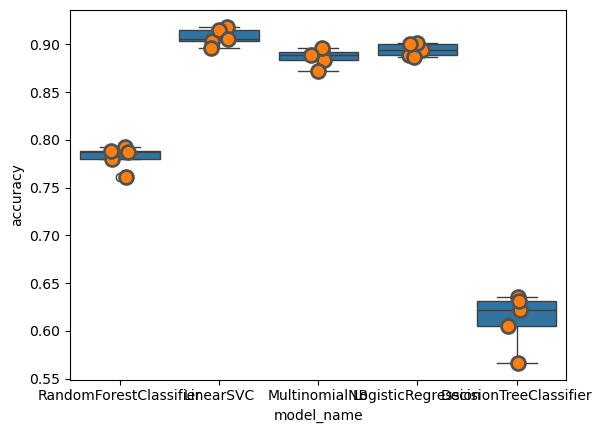

In [34]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=10, jitter=True, edgecolor="auto", linewidth=2)
plt.show()

### Multinomial NB

In [35]:
## Multinomial NB
from sklearn.model_selection import train_test_split

model = MultinomialNB()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_balanceado.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred,target_names=df_balanceado['categoria'].unique()))

                precision    recall  f1-score   support

      esportes       0.98      0.91      0.95       140
      nacional       0.84      0.84      0.84       147
 internacional       0.90      0.82      0.86       159
      economia       0.79      0.86      0.83       137
      politica       0.81      0.83      0.82       141
entretenimento       0.91      0.96      0.93       167

      accuracy                           0.87       891
     macro avg       0.87      0.87      0.87       891
  weighted avg       0.87      0.87      0.87       891



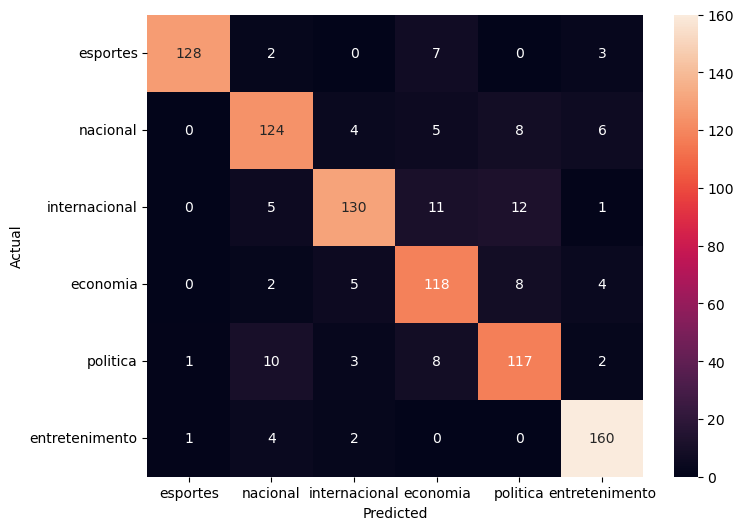

In [37]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id_df.categoria.values, yticklabels=category_id_df.categoria.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### LogisticRegression

In [38]:
from sklearn.model_selection import train_test_split

model2 = LogisticRegression(random_state=0)

X_train2, X_test2, y_train2, y_test2, indices_train2, indices_test2 = train_test_split(features, labels, df_balanceado.index, test_size=0.33, random_state=0)
model2.fit(X_train2, y_train2)
y_pred2 = model.predict(X_test2)

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_test2, y_pred2,target_names=df_balanceado['categoria'].unique()))

                precision    recall  f1-score   support

      esportes       0.98      0.91      0.95       140
      nacional       0.84      0.84      0.84       147
 internacional       0.90      0.82      0.86       159
      economia       0.79      0.86      0.83       137
      politica       0.81      0.83      0.82       141
entretenimento       0.91      0.96      0.93       167

      accuracy                           0.87       891
     macro avg       0.87      0.87      0.87       891
  weighted avg       0.87      0.87      0.87       891



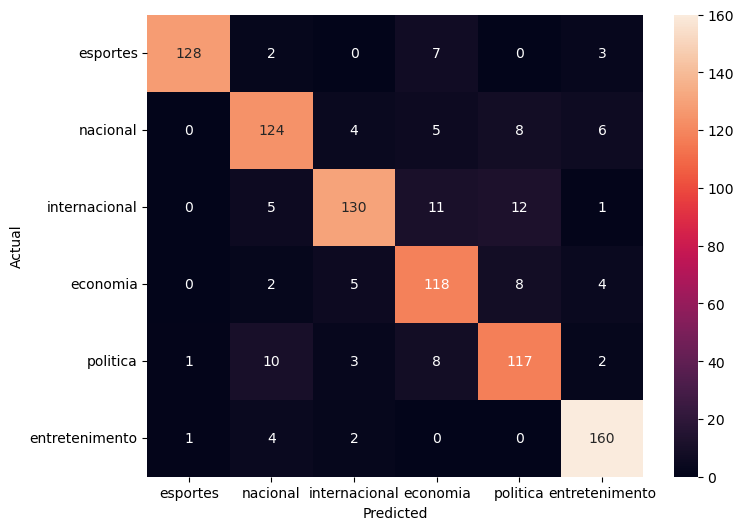

In [40]:
from sklearn.metrics import confusion_matrix

conf_mat2 = confusion_matrix(y_test2, y_pred2)
fig2, ax2 = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat2, annot=True, fmt='d', xticklabels=category_id_df.categoria.values, yticklabels=category_id_df.categoria.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Testando o(s) Modelo(s)

### Multinomial NB

In [41]:
texts = [""" França deu o último passo, nesta segunda-feira (4), para se tornar o primeiro país do mundo a prever o acesso ao aborto em sua Constituição.
O Congresso francês, que reúne as duas casas do Parlamento em Versalhes para votação quando há mudanças na Constituição, aprovou por ampla maioria o projeto que constitucionaliza o aborto. Dos 852 deputados e senadores reunidos, 780 votaram a favor e 72 contra.

Após a promulgação pelo presidente francês, o que deve acontecer na sexta-feira (8), Dia da Mulher, o artigo 34.º artigo da Constituição francesa passará a prever a “liberdade garantida da mulher de recorrer ao direito à interrupção voluntária da gravidez [IVG, sigla usada para se referir ao aborto na França]”. 
Raízes históricas por trás da mudança

A decisão, considerada histórica por movimentos feministas e partidos de esquerda, é uma construção de séculos.

A defesa dos direitos femininos na França tem raízes históricas. Já no século XV, a escritora Christine de Pizan defendeu o direito das mulheres à educação. Três séculos depois, Olympe de Gouges criticou a exclusão das mulheres da “Declaração dos Direitos do Homem e do Cidadão” na Revolução Francesa de 1789. E em 1949, no livro “O Segundo Sexo”, Simone de Beauvoir estruturou as bases que definem o feminismo moderno ao discutir a opressão da mulher em um mundo dominado pelo homem.

A França também é o país que, ainda no início do século passado, separou a Igreja do Estado ao aprovar em 1905 a Lei da Laicidade, afastando a religião das discussões políticas. 

Esses são alguns dos fatores que explicam por que 86% dos franceses apoiam a constitucionalização do aborto, como demonstrou uma pesquisa do final de 2022 – taxa bem superior à do Brasil, onde a aprovação ao aborto é de 39%. 

Com o apoio massivo da população francesa, senadores admitiram que votaram a favor do texto para evitar críticas. No último dia 28 de fevereiro, o Senado francês, de maioria direitista, aprovou o projeto por ampla maioria, com 267 votos a favor e 50 contra."""]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  #print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))

  - Predicted as: 'politica'


In [42]:
texts = [""" Mais um preso que fugiu de um presídio na região metropolitana de Belo Horizonte (MG) foi recapturado pela Polícia Militar. Com isso, quatro dos nove fugitivos já foram encontrados.

João Batista Freire Rodrigues Filho foi localizado por policiais na manhã do último domingo (3). Ele estava preso na penitenciária de Santa Luzia, na Grande Belo Horizonte. A fuga ocorreu na última quarta-feira (29).

Segundo a Secretaria de Estado de Justiça e Segurança, o preso foi encontrado em Juatuba, também na região metropolitana de Belo Horizonte. Informações do Disque-Denúncia levaram os agentes a encontrá-lo.Até o momento, a Secretaria de Segurança afirmou que cinco fugitivos ainda não foram localizados. O terceiro recapturado foi encontrado na última sexta-feira (1º) pela Polícia Militar. Os outros dois foram recapturados no mesmo dia da fuga.

Em nota, a pasta ressalta que a população pode continuar ajudando as forças de segurança com informações, por meio do Disque-Denúncia (181). A secretaria afirma que a ligação é gratuita e o canal garante 100% o anonimato do denunciante."""]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  #print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))

  - Predicted as: 'nacional'


In [43]:
texts = ["""A cantora foi expulsa do reality show no último sábado (2), após ser acusada de agressão pelo participante Davi Brito.

Em um vídeo publicado no stories de seu perfil no Instagram, Zilu explicou que as coisas não estão bem no momento. No entanto, garantiu que, em breve, devem melhorar.

“A gente está aqui, enchendo ela de carinho e de amor. Está todo mundo trabalhando, é vida que segue, bola para frente. Deus sabe de todas as coisas, Deus sabe o que é melhor para cada um de nós e Ele age de acordo com aquilo que é melhor pra gente”, afirmou.

Sem mencionar Dado Dolabella, atual namorado de Wanessa, Zilu disse que permanecerá na casa da filha. “Então, a gente não pode julgar, atacar ou fazer nada a não ser orar e deixar tudo nas mãos de Deus. É isso que eu acredito e isso que será feito”, acrescentou. Ao final, a empresária afirmou que aos poucos Camargo está retomando sua rotina. “Agora mesmo ela foi buscar o Joãozinho, ela está a todo vapor. Lógico que as coisas não estão bem, mas vai ficar. Tenho certeza que vai ficar”, concluiu.
A expulsão de Wanessa Camargo

A decisão da produção do BBB 24 sobre a desclassificação de Wanessa aconteceu na tarde do último sábado (2), horas depois de Davi ter dito que a cantora lhe deu um tapa enquanto ele dormia.

“Ela viu que eu estava deitado. São quatro camas naquele quarto, ela veio bater logo na minha cama? Além disso ser provocação, é falta de respeito. Eu estava dormindo, cara. Perdi até o sono”, disse.

“Aí quando você está no seu momento de paz, tem que acontecer. Tem que acontecer alguma coisa, tirar você do sério. Isso não vai ficar de graça não”, afirmou ele. """]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  #print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))

  - Predicted as: 'entretenimento'


### LogisticRegression

In [44]:
texts = [""" França deu o último passo, nesta segunda-feira (4), para se tornar o primeiro país do mundo a prever o acesso ao aborto em sua Constituição.
O Congresso francês, que reúne as duas casas do Parlamento em Versalhes para votação quando há mudanças na Constituição, aprovou por ampla maioria o projeto que constitucionaliza o aborto. Dos 852 deputados e senadores reunidos, 780 votaram a favor e 72 contra.

Após a promulgação pelo presidente francês, o que deve acontecer na sexta-feira (8), Dia da Mulher, o artigo 34.º artigo da Constituição francesa passará a prever a “liberdade garantida da mulher de recorrer ao direito à interrupção voluntária da gravidez [IVG, sigla usada para se referir ao aborto na França]”. 
Raízes históricas por trás da mudança

A decisão, considerada histórica por movimentos feministas e partidos de esquerda, é uma construção de séculos.

A defesa dos direitos femininos na França tem raízes históricas. Já no século XV, a escritora Christine de Pizan defendeu o direito das mulheres à educação. Três séculos depois, Olympe de Gouges criticou a exclusão das mulheres da “Declaração dos Direitos do Homem e do Cidadão” na Revolução Francesa de 1789. E em 1949, no livro “O Segundo Sexo”, Simone de Beauvoir estruturou as bases que definem o feminismo moderno ao discutir a opressão da mulher em um mundo dominado pelo homem.

A França também é o país que, ainda no início do século passado, separou a Igreja do Estado ao aprovar em 1905 a Lei da Laicidade, afastando a religião das discussões políticas. 

Esses são alguns dos fatores que explicam por que 86% dos franceses apoiam a constitucionalização do aborto, como demonstrou uma pesquisa do final de 2022 – taxa bem superior à do Brasil, onde a aprovação ao aborto é de 39%. 

Com o apoio massivo da população francesa, senadores admitiram que votaram a favor do texto para evitar críticas. No último dia 28 de fevereiro, o Senado francês, de maioria direitista, aprovou o projeto por ampla maioria, com 267 votos a favor e 50 contra."""]
text_features = tfidf.transform(texts)
predictions2 = model2.predict(text_features)
for text, predicted in zip(texts, predictions2):
  #print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))

  - Predicted as: 'politica'


In [45]:
texts = [""" Mais um preso que fugiu de um presídio na região metropolitana de Belo Horizonte (MG) foi recapturado pela Polícia Militar. Com isso, quatro dos nove fugitivos já foram encontrados.

João Batista Freire Rodrigues Filho foi localizado por policiais na manhã do último domingo (3). Ele estava preso na penitenciária de Santa Luzia, na Grande Belo Horizonte. A fuga ocorreu na última quarta-feira (29).

Segundo a Secretaria de Estado de Justiça e Segurança, o preso foi encontrado em Juatuba, também na região metropolitana de Belo Horizonte. Informações do Disque-Denúncia levaram os agentes a encontrá-lo.Até o momento, a Secretaria de Segurança afirmou que cinco fugitivos ainda não foram localizados. O terceiro recapturado foi encontrado na última sexta-feira (1º) pela Polícia Militar. Os outros dois foram recapturados no mesmo dia da fuga.

Em nota, a pasta ressalta que a população pode continuar ajudando as forças de segurança com informações, por meio do Disque-Denúncia (181). A secretaria afirma que a ligação é gratuita e o canal garante 100% o anonimato do denunciante."""]
text_features2 = tfidf.transform(texts)
predictions2 = model2.predict(text_features)
for text, predicted in zip(texts, predictions2):
  #print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))

  - Predicted as: 'politica'


In [46]:
texts = ["""A cantora foi expulsa do reality show no último sábado (2), após ser acusada de agressão pelo participante Davi Brito.

Em um vídeo publicado no stories de seu perfil no Instagram, Zilu explicou que as coisas não estão bem no momento. No entanto, garantiu que, em breve, devem melhorar.

“A gente está aqui, enchendo ela de carinho e de amor. Está todo mundo trabalhando, é vida que segue, bola para frente. Deus sabe de todas as coisas, Deus sabe o que é melhor para cada um de nós e Ele age de acordo com aquilo que é melhor pra gente”, afirmou.

Sem mencionar Dado Dolabella, atual namorado de Wanessa, Zilu disse que permanecerá na casa da filha. “Então, a gente não pode julgar, atacar ou fazer nada a não ser orar e deixar tudo nas mãos de Deus. É isso que eu acredito e isso que será feito”, acrescentou. Ao final, a empresária afirmou que aos poucos Camargo está retomando sua rotina. “Agora mesmo ela foi buscar o Joãozinho, ela está a todo vapor. Lógico que as coisas não estão bem, mas vai ficar. Tenho certeza que vai ficar”, concluiu.
A expulsão de Wanessa Camargo

A decisão da produção do BBB 24 sobre a desclassificação de Wanessa aconteceu na tarde do último sábado (2), horas depois de Davi ter dito que a cantora lhe deu um tapa enquanto ele dormia.

“Ela viu que eu estava deitado. São quatro camas naquele quarto, ela veio bater logo na minha cama? Além disso ser provocação, é falta de respeito. Eu estava dormindo, cara. Perdi até o sono”, disse.

“Aí quando você está no seu momento de paz, tem que acontecer. Tem que acontecer alguma coisa, tirar você do sério. Isso não vai ficar de graça não”, afirmou ele. """]
text_features2 = tfidf.transform(texts)
predictions2 = model.predict(text_features2)
for text, predicted in zip(texts, predictions2):
  #print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))

  - Predicted as: 'entretenimento'


## Conclusão

## Referências

Dien, Tran Thanh; Loc, Bui Huu; Thai-Nghe, Nguyen  (2019).  [IEEE 2019 International Conference on Advanced Computing and Applications (ACOMP) - Nha Trang, Vietnam (2019.11.26-2019.11.28)] 2019 International Conference on Advanced Computing and Applications (ACOMP) - Article Classification using Natural Language Processing and Machine Learning.,(),78–84.doi:10.1109/acomp.2019.00019 <br>
F. Miao, P. Zhang, L. Jin and H. Wu, "Chinese News Text Classification Based on Machine Learning Algorithm," 2018 10th International Conference on Intelligent Human-Machine Systems and Cybernetics (IHMSC), Hangzhou, China, 2018, pp. 48-51, doi: 10.1109/IHMSC.2018.10117. keywords: {Text categorization;Classification algorithms;Machine learning algorithms;Training;Support vector machines;Bayes methods;Computational modeling;Chinese text classification;Chinese word segment;Feature extraction;Machine learning algorithm},<br>